<a href="https://colab.research.google.com/github/Mamidis-LD/DS-Projs/blob/main/Cifar10_Image_Classification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# !pip install te
from PIL import Image
import numpy as np
import tensorflow as tf
from keras import datasets
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.losses import SparseCategoricalCrossentropy
from keras import models

In [16]:
data = datasets.cifar10
(X_train, y_train), (X_test, y_test) = data.load_data()

In [10]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',  'dog', 'frog', 'horse', 'ship', 'truck']

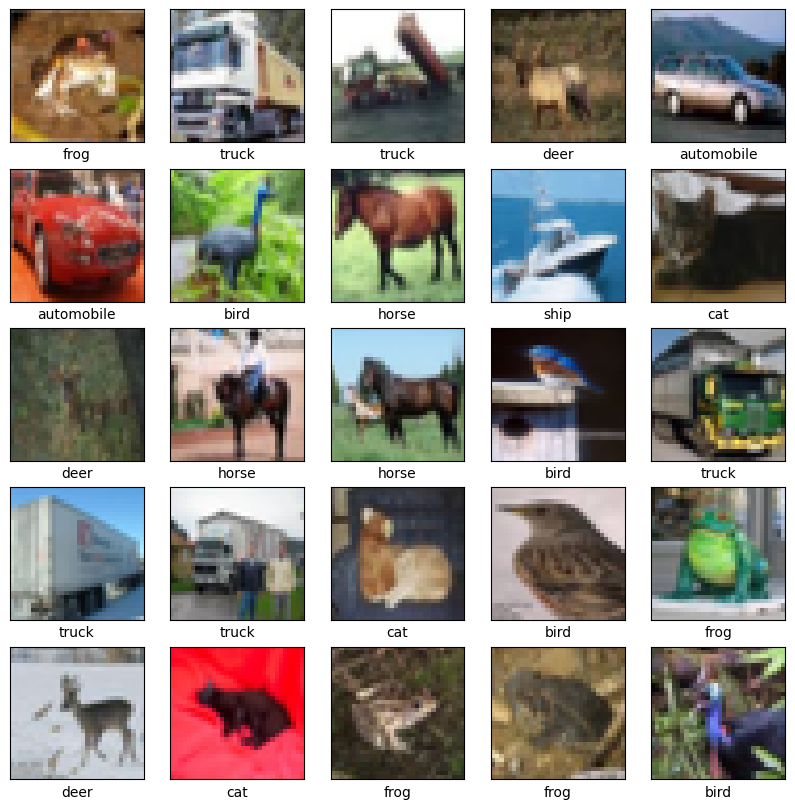

In [28]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], aspect='auto')
    plt.xlabel(labels[y_train[i][0]])
    plt.xticks([])
    plt.yticks([])

plt.show()

In [7]:


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))


model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('sigmoid'))

model.compile(loss='SparseCategoricalCrossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))
loss, accuracy = model.evaluate(X_test,y_test)
print(loss)
print(accuracy)

Epoch 1/10
1563/1563 [==============================] - 15s 6ms/step - loss: 1.7511 - accuracy: 0.3512 - val_loss: 1.3809 - val_accuracy: 0.4939
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4056 - accuracy: 0.4955 - val_loss: 1.3047 - val_accuracy: 0.5374
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2735 - accuracy: 0.5493 - val_loss: 1.1491 - val_accuracy: 0.5886
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1844 - accuracy: 0.5827 - val_loss: 1.0803 - val_accuracy: 0.6112
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1193 - accuracy: 0.6084 - val_loss: 1.0845 - val_accuracy: 0.6076
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0675 - accuracy: 0.6263 - val_loss: 1.0075 - val_accuracy: 0.6443
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0231 - accuracy: 0.6406 - val_loss: 0.9490 - val_accuracy

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Create data generators
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Generate augmented data
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_generator,
          epochs=10,
          validation_data=test_generator)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')


170498071/170498071 [==============================] - 4s 0us/step
Epoch 1/10
1563/1563 [==============================] - 49s 28ms/step - loss: 1.8123 - accuracy: 0.1135 - val_loss: 2.9323 - val_accuracy: 0.0000e+00
Epoch 2/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.5697 - accuracy: 0.0969 - val_loss: 2.8119 - val_accuracy: 0.0000e+00
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4629 - accuracy: 0.0985 - val_loss: 3.0216 - val_accuracy: 0.0000e+00
Epoch 4/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.4033 - accuracy: 0.0992 - val_loss: 2.8560 - val_accuracy: 0.0000e+00
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.3583 - accuracy: 0.0991 - val_loss: 2.9732 - val_accuracy: 0.0000e+00
Epoch 6/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.3245 - accuracy: 0.0991 - val_loss: 2.6177 - val_accuracy: 0.0000e+00
Epoch 7/10
1563/1563 [===========

In [3]:
import tensorflow as tf

# Display the version
print(tf.__version__)

# other imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model


# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)



# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

# number of classes
K = len(set(y_train))

# calculate total number of classes
# for output layer
print("number of classes:", K)

# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()


# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(
  x_train, y_train, validation_data=(x_test, y_test), epochs=50)

2.15.0
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
number of classes: 10
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                      

In [4]:
# Fit with data augmentation
# Note: if you run this AFTER calling
# the previous model.fit()
# it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

r = model.fit(train_generator, validation_data=(x_test, y_test),
              steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 36s 22ms/step - loss: 0.5419 - accuracy: 0.8269 - val_loss: 0.5309 - val_accuracy: 0.8343
Epoch 2/50
1562/1562 [==============================] - 34s 22ms/step - loss: 0.4399 - accuracy: 0.8566 - val_loss: 0.4709 - val_accuracy: 0.8462
Epoch 3/50
1562/1562 [==============================] - 35s 22ms/step - loss: 0.4053 - accuracy: 0.8644 - val_loss: 0.4719 - val_accuracy: 0.8517
Epoch 4/50
1562/1562 [==============================] - 35s 22ms/step - loss: 0.3819 - accuracy: 0.8726 - val_loss: 0.4717 - val_accuracy: 0.8524
Epoch 5/50
1562/1562 [==============================] - 35s 22ms/step - loss: 0.3633 - accuracy: 0.8781 - val_loss: 0.4801 - val_accuracy: 0.8467
Epoch 6/50
1562/1562 [==============================] - 35s 22ms/step - loss: 0.3557 - accuracy: 0.8807 - val_loss: 0.4373 - val_accuracy: 0.8602
Epoch 7/50
1562/1562 [==============================] - 37s 24ms/step - loss: 0.3403 - accuracy: 0.8852 - val_loss: 0.4283 -

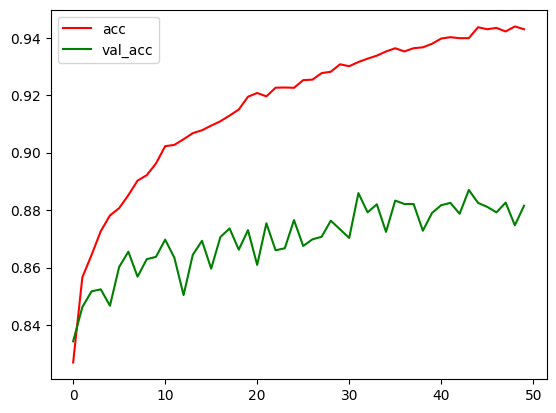

In [6]:

# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

1/1 [==============================] - 1s 802ms/step
Original label is cat and predicted label is cat


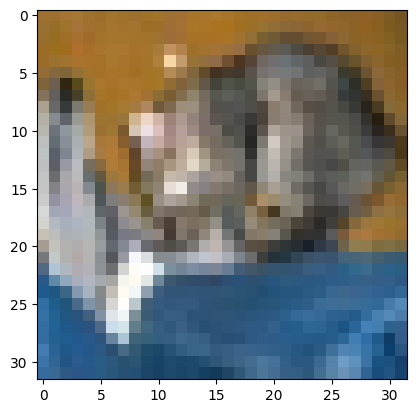

In [5]:
# label mapping

labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()

# select the image from our test dataset
image_number = 0
# display the image
plt.imshow(x_test[image_number])
# load the image in an array
n = np.array(x_test[image_number])
# reshape i
p = n.reshape(1, 32, 32, 3)
# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]
# load the original label
original_label = labels[y_test[image_number]]
# display the result
print("Original label is {} and predicted label is {}".format(
	original_label, predicted_label))

In [7]:
model.save('geeksforgeeks.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
